# Multilayer perceptron binary classification + Hyperparamter

### Deklarasi pustaka

In [1]:
# proses numerik
import numpy as np

# proses manipulasi data
import pandas as pd
import pandas_profiling as pp

# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# pustaka untuk waktu komputasi
import time
from datetime import datetime

# Pustaka untuk normalisasi data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Pustaka untuk pembagian data
import sklearn
from sklearn.model_selection import train_test_split

# proses machine learning with algoritma MLP
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, Adamax, RMSprop, SGD
from keras.utils import to_categorical

### Configurasi awal

In [2]:
# Set waktu komputasi
start = time.time()

In [3]:
# fix random seed for reproducibility
np.random.seed(1234)

### 1. Akuisisi Data

In [4]:
# # load dataset v1
# df = pd.read_csv('D:/Bahan Ajar Big Data/dataset/dataset_heart_disease_v1.csv', na_values=["n/a", "na", "--", "?"])

# load dataset v2
df = pd.read_csv('D:/Bahan Ajar Big Data/dataset/dataset_heart_disease_v2.csv', na_values=["n/a", "na", "--", "?"])

In [5]:
# melihat 5 data terakhir daro dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### 2. Eksplorasi Data Analisis

In [6]:
# cek eda with pandas-profiling
# pp.ProfileReport(df)

In [7]:
# cek sebaran data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


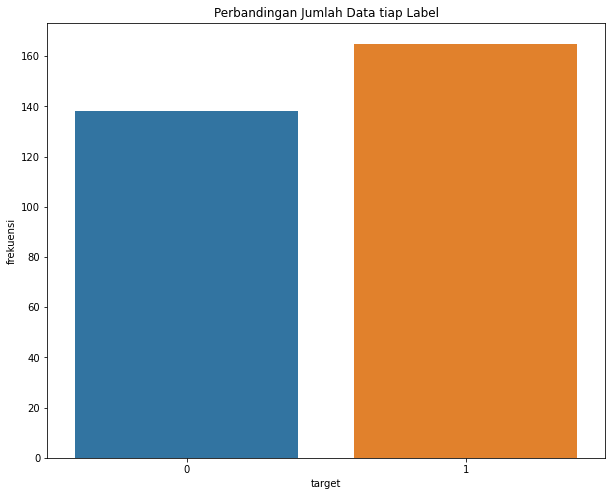

In [8]:
# membuat frame
plt.figure(figsize=(10,8))

# proses visual countplot
sns.countplot(x='target', data=df)

# membuat title dan label x y
plt.title('Perbandingan Jumlah Data tiap Label')
plt.xlabel('target');
plt.ylabel('frekuensi');

plt.show()

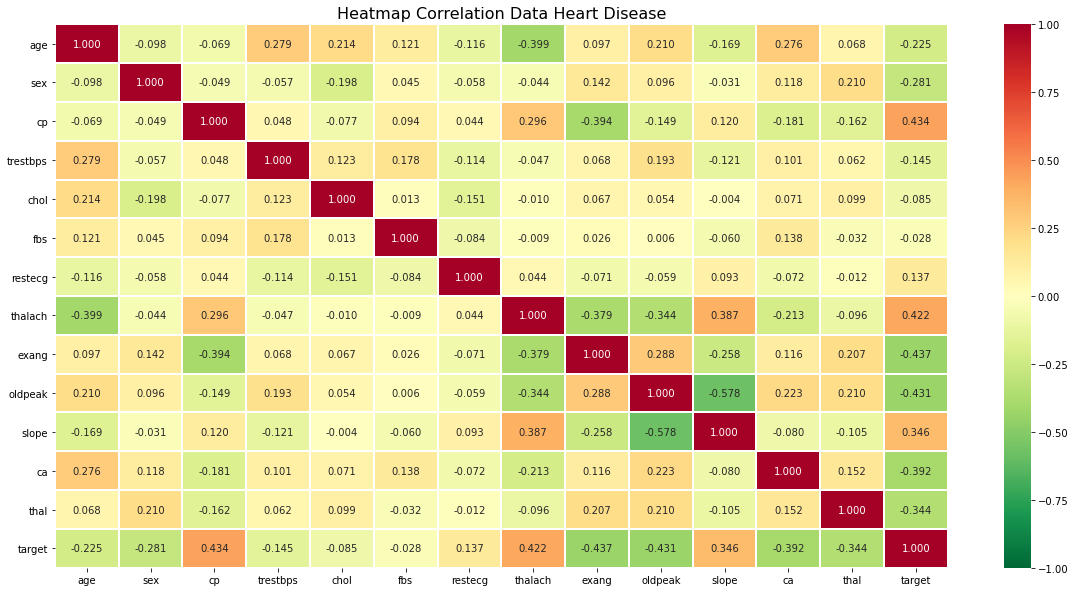

In [9]:
# membuat frame heatmap
fig, ax = plt.subplots(figsize=(20,10))

# proses visual heatmap
# => pilihan warna lain untuk visual heatmap (coolwarm, Blues, RdYlGn_r, viridis, YlGnBu)
sns.heatmap(df.corr(method='pearson'), cmap="RdYlGn_r", vmax=1, vmin=-1, linewidths=1, fmt='.3f', annot=True, ax=ax)

# membuat title atau judul
plt.title("Heatmap Correlation Data Heart Disease", fontsize=16)

# Menampilkan hasil visualisasi
plt.show()